In [ ]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from numpy import where
from statistics import mean

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def predict(df, x):
  level=0
  min=0
  k=0
  c=0
  time=0
  m=[]
  t=df['t'].iloc[0]
  status = -1 
  data = {'status': [], 'elapased_time': []}
  df_new = pd.DataFrame(data)
  for index, row in df.iterrows():
    if (row['X']>x[1] or row['X']<x[0] or row['Y']>x[2] or row['Y']<x[3]):
      if status==0 and (row['t']-t)>=0.1:
        df_new=df_new.append({'status':0,'elapased_time':row['t']-t},ignore_index=True)
        t=row['t']
      status= 1
    else:
      if status==1 and (row['t']-t)>=0.1:
        df_new=df_new.append({'status':1,'elapased_time':row['t']-t},ignore_index=True)
        t=row['t']
      status= 0
  df_new=df_new.append({'status':status,'elapased_time':df['t'].iloc[-1]-t},ignore_index=True)
  new_dtypes = {"status": int, "elapased_time": float}
  df_new = df_new.astype(new_dtypes)

  result='non-cheat'
  sum_0=df_new.loc[df_new['status'] == 0, 'elapased_time'].sum()
  sum_1=df_new.loc[df_new['status'] == 1, 'elapased_time'].sum()
  # print(sum_1)
  if (df_new.shape[0]<=3): # if frequency less than 2 mean state change only once. no need svm to detect cheat. just sum comparsion can make decision
    if (sum_1 > sum_0):
      result = 'cheat'
    print('non svm 1')
  # elif sum_1<20: #comparatively low value looking outside of the screen
  #   result='non-cheat'
  #   print('non svm 0')
  else:
    svm = OneClassSVM(kernel='rbf', gamma=0.001, nu=0.1)
    svm.fit(df_new)
    pred = svm.predict(df_new)
    anom_index = where(pred==-1) 
    values = df_new.loc[anom_index]
    df_new['svm_p']=pred

    min = df_new['elapased_time'][(df_new['svm_p']==-1) & (df_new['elapased_time']<2)].max()

    for index, row in df_new.iterrows():
      if (row['svm_p']==-1 and row['status']==0 and row['elapased_time']>min and k>0):
        # m.append(k*time)
        if k>2:
          result='cheat'
        # print('m = '+str(m))
        k=0
        time=0
      else:
        if(row['elapased_time']>min and row['status']==1):
          k=k+1
        time += row['elapased_time']

    if k>2:
      result='cheat'
      # print(k, time)
      # m.append(k*time)
      # print('m = '+str(m))

    if (len(df_new[(df_new['svm_p']==-1) & (df_new['elapased_time']>min) & (df_new['status']==1)])>=1):
      result='cheat'

  return result

In [ ]:
# def get_level(k):
#   if k>1500:
#     return "High"
#   if k>

def get_results(df,x):
  df=df
  x=x
  results = pd.DataFrame(columns=['start_t', 'end_t', 'prediction'])
  c=0                 
  for i in range(0,df.shape[0],1500):
    if (not ((i+3000)>df.shape[0])):
      start_t= df.loc[i,'t']
      # if i+3000 <= df.shape[0]:
      end_t= df.loc[i+3000,'t']
      
      dfw=df[i:i+3000]
      # dfw['t'] = dfw['t']-start_t
      r = predict(dfw,x)
      results.loc[c]= [start_t,end_t,r]
      c+=1
  return results

In [ ]:
def plot(t_ddf,results):
  plt.figure(figsize=(20, 6))
  
  for i in range(0,len(t_df)-1,2):
    plt.plot([t_df[i],t_df[i+1]],[0,0],c='r') 
    plt.axvline(x=t_df[i],c='r',linestyle="--")
    plt.axvline(x=t_df[i+1],c='r',linestyle="--")
  for index, row in results.iterrows():
    if row['prediction']=='cheat':
      plt.plot([row['start_t'],row['end_t']],[index+1,index+1],c='k')
    else:
      plt.plot([row['start_t'],row['end_t']],[index+1,index+1],c='b')

## Subject 1

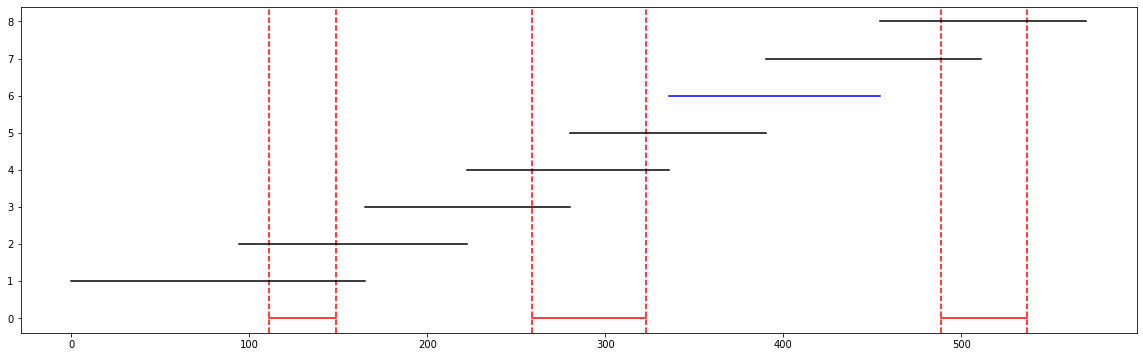

In [ ]:
m= 14409

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_1_1.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 7                  | 0                      |
| Actual not cheating case | 0                  | 1                   |

In [ ]:
results

,start_t,end_t,prediction
0,0.0000,165.0976,cheat
1,94.4266,222.3175,cheat
2,165.0976,280.1333,cheat
3,222.3175,335.8187,cheat
4,280.1333,390.4242,cheat
5,335.8187,454.4054,non-cheat
6,390.4242,511.0177,cheat
7,454.4054,569.8698,cheat


In [ ]:
t_df

[353.819, 419.726, 466.822, 513.852, 564.7]

non svm 1
non svm 1
non svm 1
non svm 1


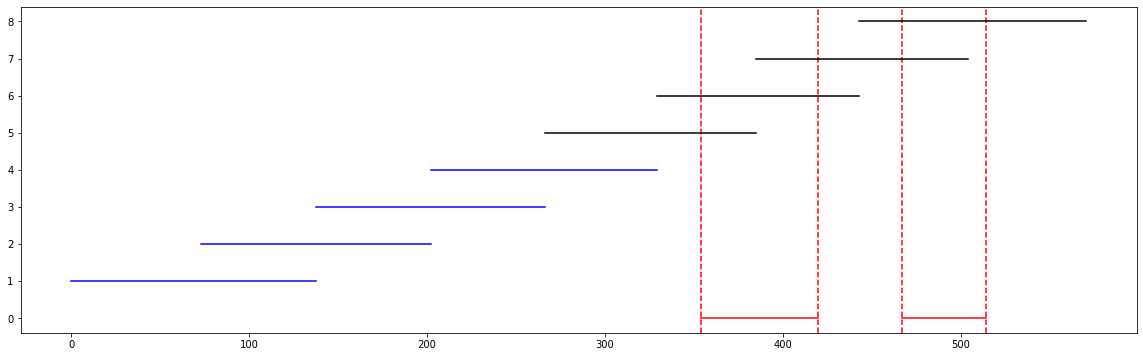

In [ ]:
m=14386

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_1_2.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 4                  | 0                      |
| Actual not cheating case | 0                  | 4                   |

# subject 2

non svm 1
non svm 1


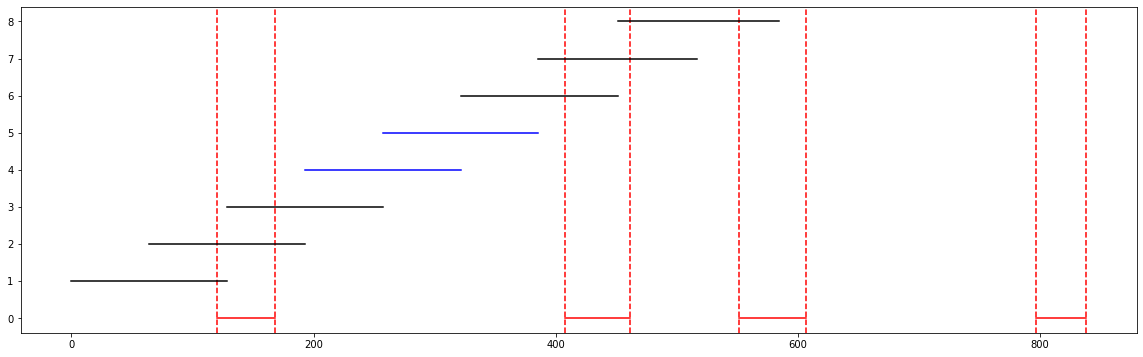

In [ ]:
m= 21272

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_1.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m-6500]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

In [ ]:
x

[30.0, 1511.0, 850.0, 11.0]

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 6                  | 0                      |
| Actual not cheating case | 2                  | 2                   |

In [ ]:
results

,start_t,end_t,prediction
0,0.0000,128.3550,cheat
1,64.0078,193.1963,cheat
2,128.3550,257.7021,cheat
3,193.1963,321.6005,non-cheat
4,257.7021,385.6438,non-cheat
5,321.6005,451.4436,cheat
6,385.6438,516.8973,cheat
7,451.4436,584.3263,cheat


non svm 1


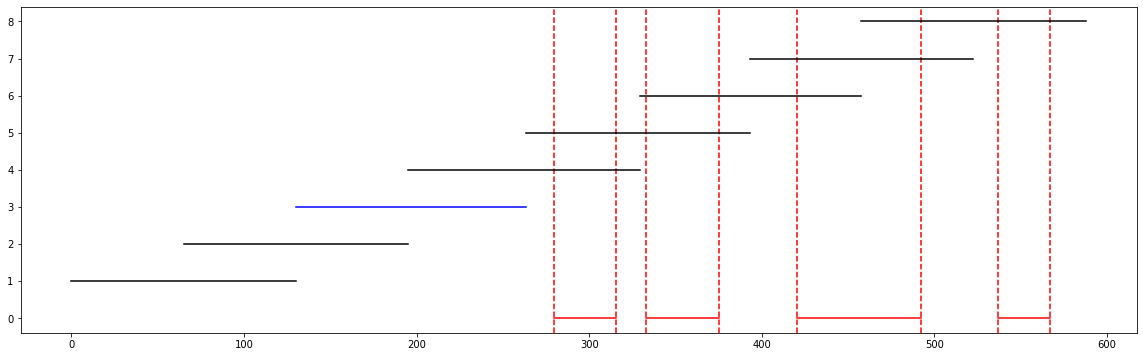

In [ ]:
m= 13833

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_2_2.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 5                  | 0                      |
| Actual not cheating case | 2                  | 1                    |


# Subject 3

non svm 1


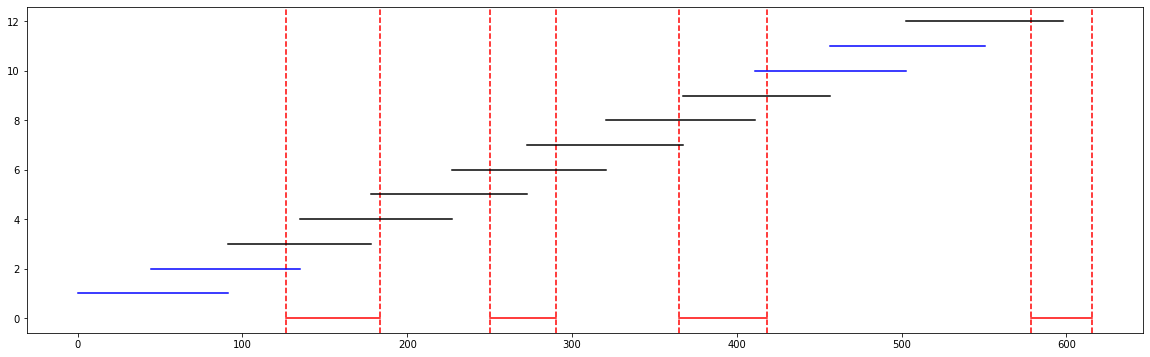

In [ ]:
m=19947

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_3_1.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 8                  | 2                     |
| Actual not cheating case | 0                  | 4                   |

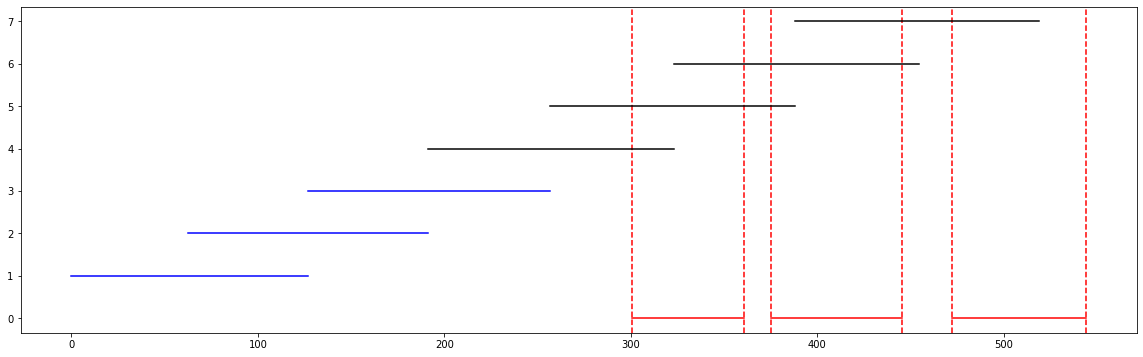

In [ ]:
m=12880

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_3_2.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 4                  | 0                     |
| Actual not cheating case | 0                  | 3                   |

# Subject 4

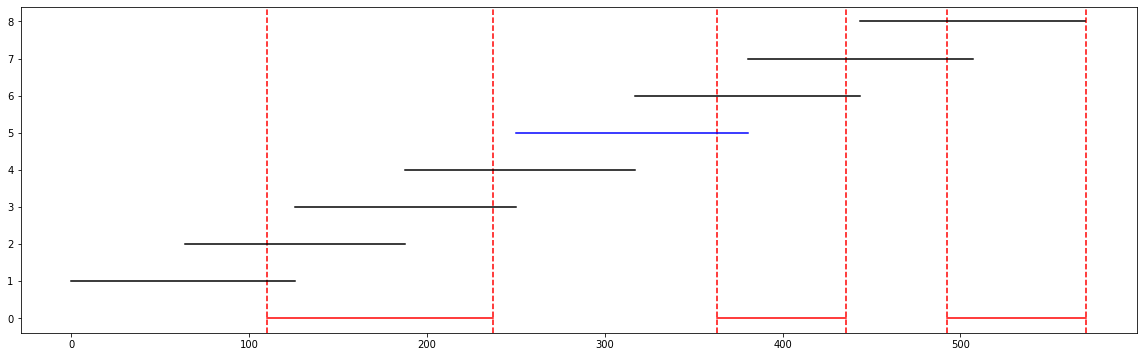

In [ ]:
m=14843

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_4_1.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 7                  | 1                     |
| Actual not cheating case | 0                  | 0                   |

# Subject 5

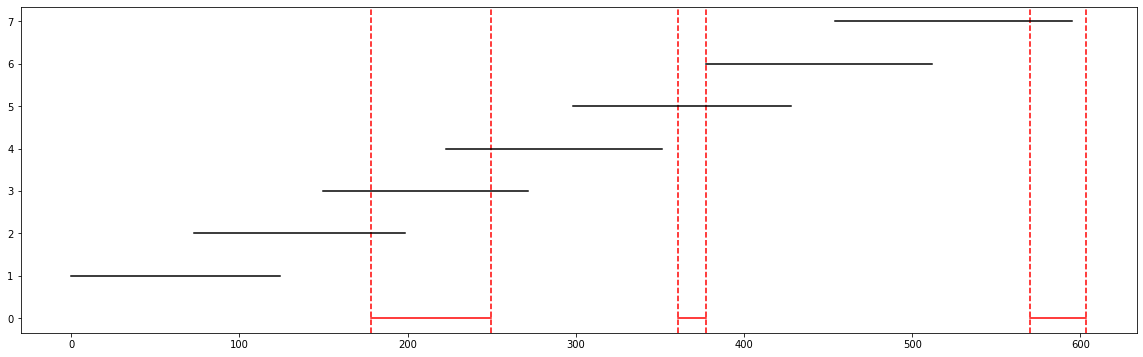

In [ ]:
m=14013

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Set New/subject_5_1.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 6                  | 0                     |
| Actual not cheating case | 2                  | 0                   |

# New Section

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 3                  | 0                     |
| Actual not cheating case | 0                  | 5                   |

|                          | Predicted as cheat | Predicted as not cheat |
|--------------------------|--------------------|------------------------|
| Actual cheating case     | 2                  | 1                     |
| Actual not cheating case | 0                  | 5                   |

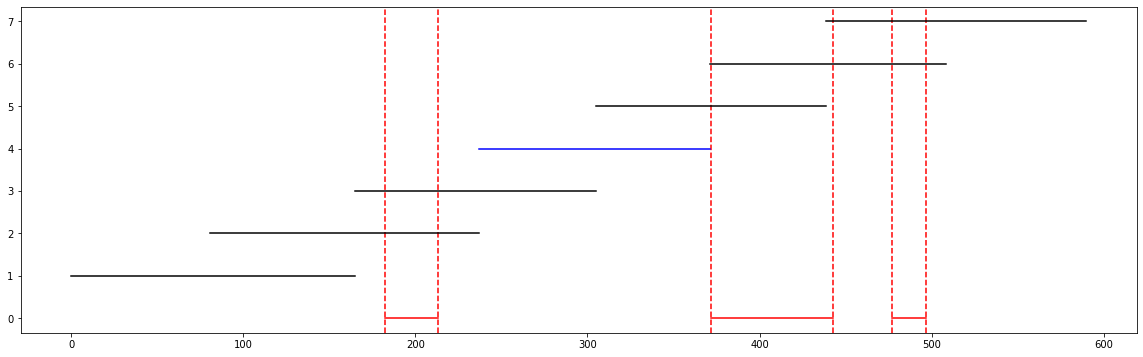

In [ ]:
m= 12670

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Sets/subject 3 - nimesha.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

In [ ]:
results

,start_t,end_t,prediction,level
0,0.0000,165.0849,cheat,1682.30160
1,80.5364,236.7018,cheat,134.58720
2,165.0849,304.8841,cheat,769.81200
3,236.7018,371.4888,non-cheat,0.00000
4,304.8841,438.4724,cheat,610.08245
5,371.4888,508.2399,cheat,978.77760
6,438.4724,589.6368,cheat,203.06750


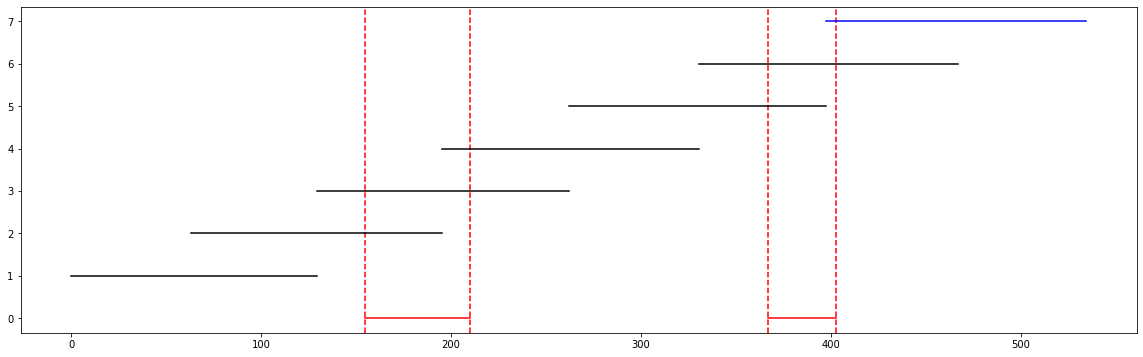

In [ ]:
m=12296

df =  pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Research/Final Solution/Data Sets/test1.csv',names=["t","X", "Y"])
t_df = (df[m+6:]['t']/1000).values.tolist()
x= df[m+1:m+5]['t'].values.tolist()
df=df[:m]
df['t']=(df['t']-df['t'][0])/1000
results = get_results(df,x)
plot(t_df,results)

In [ ]:
results

,start_t,end_t,prediction,level
0,0.0000,129.6185,cheat,754.969050
1,63.2142,195.2217,cheat,819.869233
2,129.6185,261.9680,cheat,2286.552000
3,195.2217,330.3363,cheat,567.752450
4,261.9680,397.5469,cheat,969.910200
5,330.3363,466.9902,cheat,556.719500
6,397.5469,534.3453,non-cheat,0.000000
